Подготовка данных, библиотек, анализ основной информации о данных и корреляционной матрицы

In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

df = pd.read_csv('BostonHousing.csv')
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


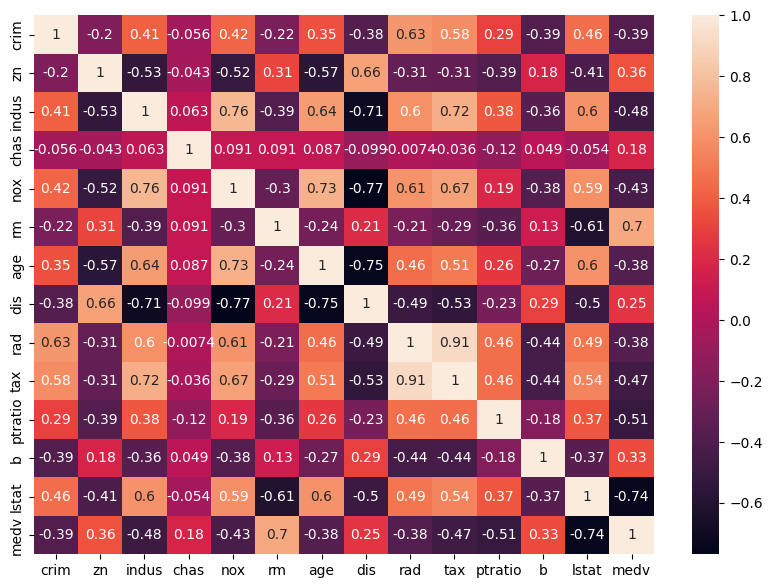

In [5]:
plt.figure(figsize=(10,7))
corr = df.corr()
ax = sns.heatmap(corr, annot=True)

In [8]:
# Из матрицы корреляции можно сделать следующие выводы:
# 1. Целевой показатель медианная стоимость MEDV
# 2. Расположение возле Charles River никак не влияет на остальные показатели. Хотя небольшая корреляция всё-таки есть (0.18)
# 3. Высокий уровень преступности Crim влияет негативно на целевой показатель
# 4. Показатель ZN в таком виде не очень репрезентативен, поскольку считается только для участвков 25 000 sq ft
# (можно посмортеть его влияение на стоимость таких участков, если исключить нулевые значения или присвоить им среднее/медианное начение)
# 5. Чем больше розничной торговли INDUS в городе, тем выше целевой показатель
# 6. Выбросы оксидов азота NIX негативно влияют на цену
# 7. Чем больше комнат RM, тем дороже лот
# 8. Чем выше налоговая ставка TAX, тем дороже лот
# 9. Соотношение учителей к ученикам PTRATIO влияет на цену
# 10. Стоимоть лота сильно зависит от статуса людей проживающих в этом районе LSTAT и др.
# Выводы предварительные, базируются исключительно на матрице корреляции, это скорее даже гепотезы!

In [11]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Анализ цены

<Axes: ylabel='Density'>

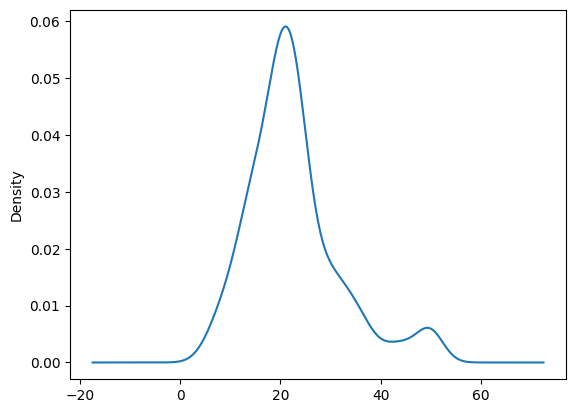

In [9]:
# Частота данных о цене
df.medv.plot.density()

In [18]:
# Основные статистические показатели цены
print(df.medv.describe())
df.medv.median()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64


21.2

Влияние количества комнат на цену

<Axes: ylabel='Density'>

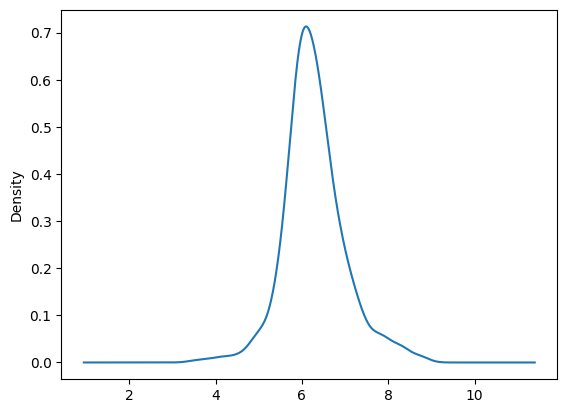

In [55]:
# Частота данных о комнатах
rooms = df.rm.copy()
rooms.plot.density()

<Axes: xlabel='rm', ylabel='medv'>

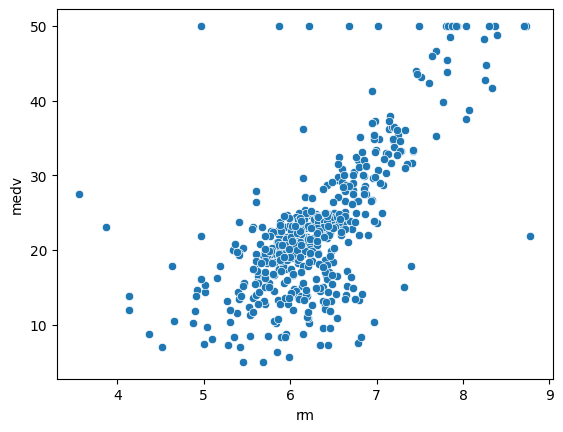

In [140]:
# Диаграмма рассеяния для количества комнат и цены
sns.scatterplot(df[['medv','rm']], x="rm", y="medv")

In [85]:
# Округлил комнаты и посчитал по ним значения цены
df_copy = df.copy()
rounded_rooms = rooms.apply(round).tolist()
df_copy['rounded_rooms'] = rounded_rooms

medv_rounded_rooms = df_copy[['medv', 'rounded_rooms']].groupby('rounded_rooms').agg(['mean', 'median', 'min', 'max'])
medv_rounded_rooms

medv                   
                    mean median   min   max
rounded_rooms                              
4              17.020000  13.80   8.8  27.5
5              14.945946  14.40   5.0  50.0
6              19.366026  19.90   5.0  50.0
7              28.047200  28.70   7.5  50.0
8              45.562500  46.35  35.2  50.0
9              40.633333  50.00  21.9  50.0

<Axes: xlabel='rounded_rooms', ylabel='medv'>

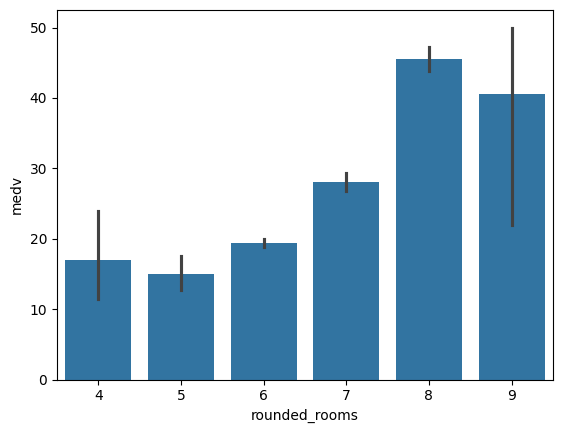

In [138]:
# Столбчатая диаграмма зависимости цены от количества комнат
sns.barplot(data = df_copy, x = 'rounded_rooms', y = 'medv')

In [123]:
# Как видно из графика, целевой показатель лота сильно зависит от количества комнат в нём.
# Аномалии с лотами с 4 и 9 комнатами характеризуются небольшой выборкой и случайными выбросами, что видно на первом графике

Влияние преступности на цену

<Axes: ylabel='Density'>

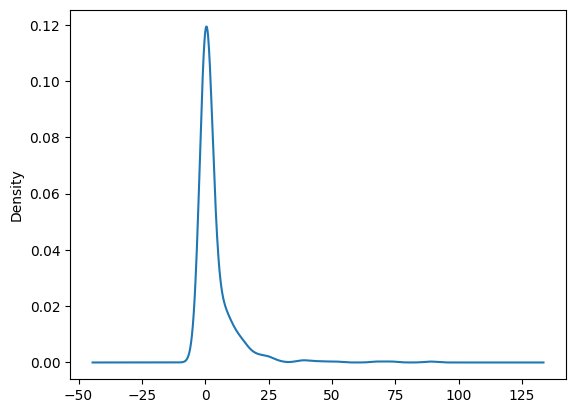

In [94]:
# Частота данных о преступности
df_copy['crim'].plot.density()

<Axes: xlabel='crim', ylabel='medv'>

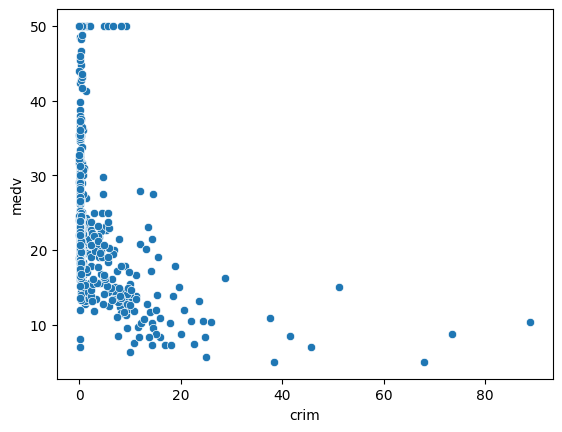

In [96]:
# График рассеяния для преступности
# Получился неудачным из-за некотрых выбросов, ниже попытался их подчистить
sns.scatterplot(data = df_copy, x = 'crim', y = 'medv')

<ipython-input-119-5e199bd13c93>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.scatterplot(data = df_copy[df.crim < 1][df.medv < 45], x = 'crim', y = 'medv')


<Axes: xlabel='crim', ylabel='medv'>

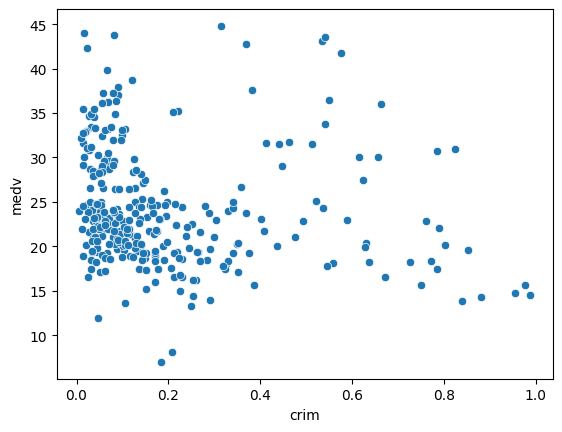

In [119]:
# Такой же график, но значения преступности здесь меньше единицы
sns.scatterplot(data = df_copy[df.crim < 1][df.medv < 45], x = 'crim', y = 'medv')

<ipython-input-120-f6323bc16e94>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.scatterplot(data = df_copy[df.crim > 1][df.crim < 20][df.medv < 45], x = 'crim', y = 'medv')


<Axes: xlabel='crim', ylabel='medv'>

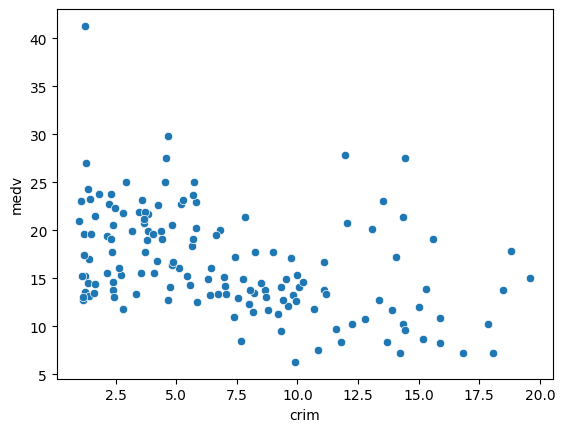

In [120]:
# Такой же график, но здесь аналогичные значения уже с 1 до 20
sns.scatterplot(data = df_copy[df.crim > 1][df.crim < 20][df.medv < 45], x = 'crim', y = 'medv')

In [ ]:
# Исходя из этих графиков, можем сделать вывод, что пока показатель преступности не высок (<1),
# цена не слишком чувствительна к его колебаниям. Но как только этот показатель переступает через
# 'нормальные' границы  цена начинает заметно снижаться.

Влияние социального статуса  соседей на цену

<Axes: ylabel='Density'>

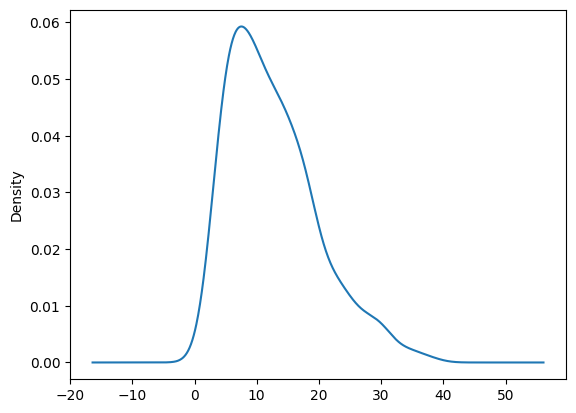

In [146]:
# Частота данных о бедном населении
df_copy['lstat'].plot.density()

<Axes: xlabel='lstat', ylabel='medv'>

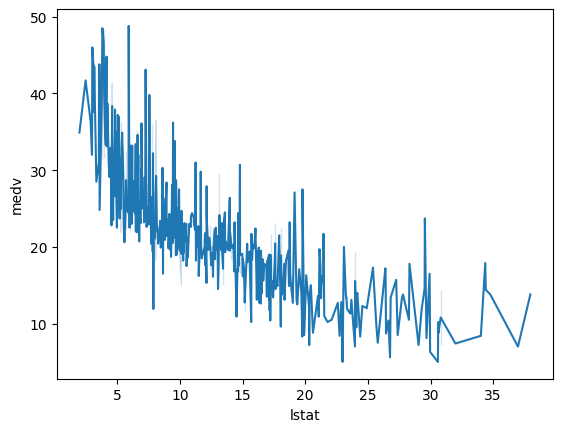

In [145]:
# Линейный график, указывающий на то, как увеличивающийся процент бедных понижает цены
sns.lineplot(data = df_copy[df_copy.medv < 50], x = 'lstat', y = 'medv')

Влияние количества учеников на одного преподавателя на цену

<Axes: ylabel='Density'>

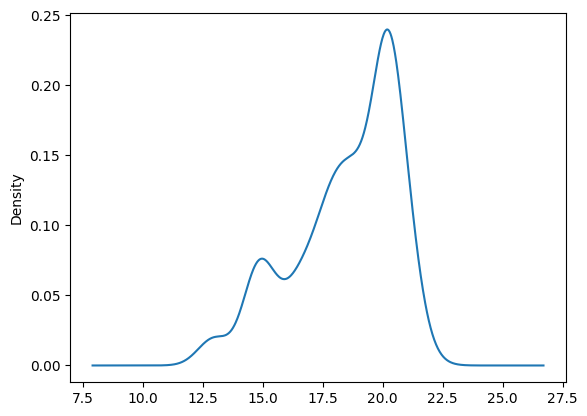

In [147]:
# Частота данных об учителях
df_copy['ptratio'].plot.density()

<Axes: xlabel='ptratio', ylabel='medv'>

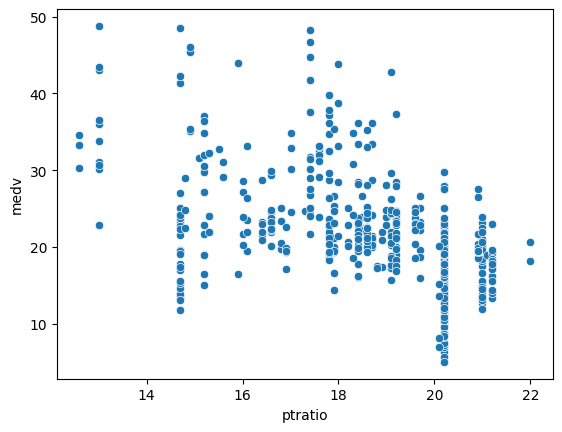

In [150]:
# Диаграмма рассеяния по ученикам и цене
# По ней сложно делать какие-то выводы, поэтому решил сгруппировать данные
sns.scatterplot(data = df_copy[df_copy.medv < 50], x = 'ptratio', y = 'medv')

In [190]:
# Объединяю в небольшие группки
for i in range(len(df_copy)):
  if df_copy.iloc[i]['ptratio'] <= 14:
    df_copy.iat[i, 10] = '12-14'
  elif df_copy.iloc[i]['ptratio'] <= 16:
    df_copy.iat[i, 10] = '14-16'
  elif df_copy.iloc[i]['ptratio'] <= 18:
    df_copy.iat[i, 10] = '16-18'
  elif df_copy.iloc[i]['ptratio'] <= 20:
    df_copy.iat[i, 10] = '18-20'
  elif df_copy.iloc[i]['ptratio'] <= 22:
    df_copy.iat[i, 10] = '20-22'

In [192]:
# Посчитал ценновые значения для этих групп
df_copy[['medv', 'ptratio']].groupby('ptratio').agg(['mean', 'median', 'min', 'max'])

medv                   
              mean median   min   max
ptratio                              
12-14    37.781250   35.3  22.8  50.0
14-16    27.376812   24.0  11.8  50.0
16-18    26.947619   24.3  14.4  50.0
18-20    23.253043   22.5  15.7  42.8
20-22    16.937811   16.3   5.0  50.0

<Axes: xlabel='ptratio', ylabel='medv'>

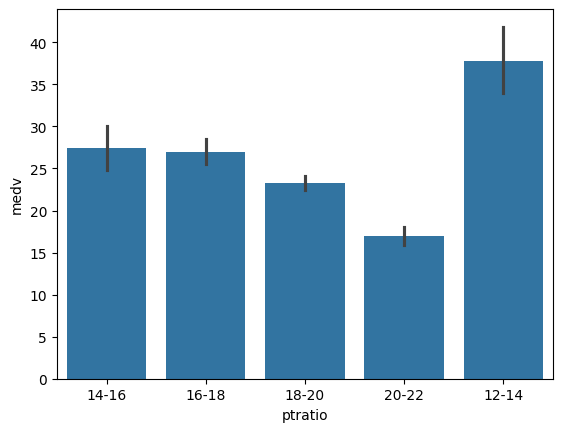

In [212]:
# Столбчатая диагармма по количеству учеников
sns.barplot(data = df_copy, x = 'ptratio', y = 'medv')

In [213]:
# Как видно из графика, целевой показатель лота зависит от количества учеников на одного учителя.
# Не знаю, как составить эти столбцы по возрастанию, но смысл ясен

Влияние площади жилой земли на цену (гипотеза 4)

In [235]:
# Посчитаем, сколько лотов имеют этот показатель
temp1 = df['zn'][df.zn > 0].count()
temp2 = df['zn'].count()
print(f'Лотов, имеющих значения, отличные от нуля: {temp1}. Процент от общего количества: {round(temp1 / temp2 *100, 1)}%')

Лотов, имеющих значения, отличные от нуля: 134. Процент от общего количества: 26.5%


<Axes: ylabel='Density'>

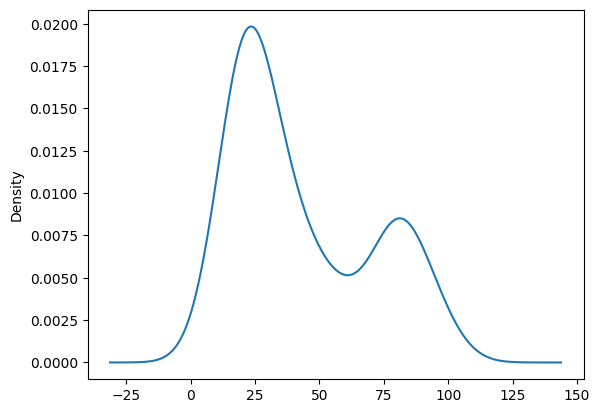

In [228]:
#  Частота данных о площади жилой земли
df['zn'][df.zn > 0].plot.density()

<Axes: xlabel='zn', ylabel='medv'>

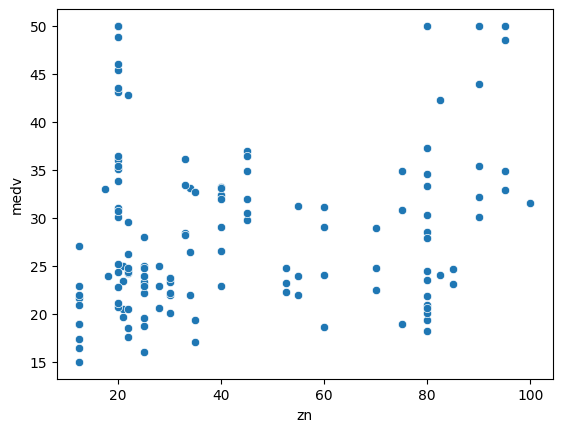

In [236]:
# Диаграмма рассеяния, из которой ничего не понятно
sns.scatterplot(data = df_copy[df.zn > 0], x = 'zn', y = 'medv')

In [271]:
# Попробуем сгруппировать данные
df_copy[['zn', 'medv']][df_copy.zn != 0].groupby('zn').count()

for i in range(len(df_copy)):
  if df_copy.iloc[i]['zn'] == 0:
    pass
  elif df_copy.iloc[i]['zn'] <= 10:
    df_copy.iat[i, 1] = '0-10'
  elif df_copy.iloc[i]['zn'] <= 20:
    df_copy.iat[i, 1] = '10-20'
  elif df_copy.iloc[i]['zn'] <= 30:
    df_copy.iat[i, 1] = '20-30'
  elif df_copy.iloc[i]['zn'] <= 40:
    df_copy.iat[i, 1] = '30-40'
  elif df_copy.iloc[i]['zn'] <= 50:
    df_copy.iat[i, 1] = '40-50'
  elif df_copy.iloc[i]['zn'] <= 60:
    df_copy.iat[i, 1] = '50-60'
  elif df_copy.iloc[i]['zn'] <= 70:
    df_copy.iat[i, 1] = '60-70'
  elif df_copy.iloc[i]['zn'] <= 80:
    df_copy.iat[i, 1] = '70-80'
  elif df_copy.iloc[i]['zn'] <= 90:
    df_copy.iat[i, 1] = '80-90'
  elif df_copy.iloc[i]['zn'] <= 100:
    df_copy.iat[i, 1] = '90-100'

temp = df_copy[['zn', 'medv']][df_copy.zn != 0].groupby('zn').agg('median')
temp

,medv
zn,
10-20,30.10
20-30,23.30
30-40,29.10
40-50,33.45
50-60,24.00
60-70,24.80
70-80,26.20
80-90,32.20
90-100,34.90


<Axes: xlabel='zn', ylabel='medv'>

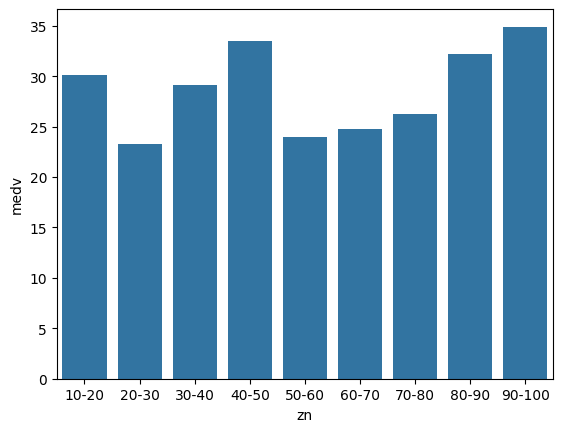

In [272]:
# Столбчатая дмаграмма
sns.barplot(data = temp, x = 'zn', y = 'medv')

In [ ]:
# Исходя из результато, можем сделать вывод, что явной зависимости между ценой и жилой площадью нет((